In [1]:
import pyfado
import os
import matplotlib.pyplot as plt

In [2]:
spec_name = "spec_wcs1d_p17q10_new_der.fits.output3"
path = "/home/mverdugo/MyCodes/pyFADO/data"
path = os.path.join(path,spec_name)
fado  = pyfado.FadoLoad(path)


In [3]:
print("Object redshift", fado.redshift)

Object redshift 0.351


In [4]:
oned = pyfado.OneD(fado)

(4000, 7000)

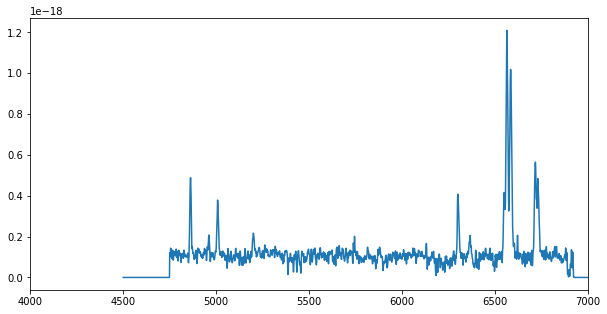

In [5]:
sp1 = oned.spectrum(row_name="observed")

fig = plt.figure(figsize=(10,5))
plt.plot(sp1.wavelength, sp1.flux)
plt.xlim(4000,7000)

(4000, 7000)

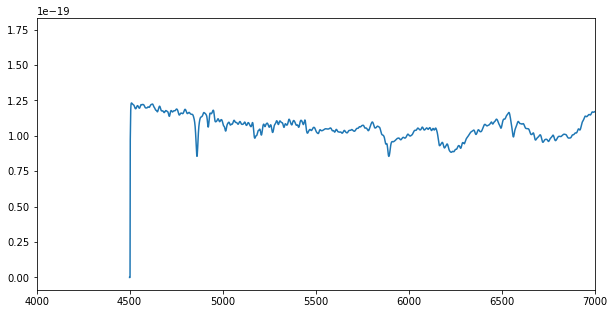

In [6]:
sp2 = oned.spectrum(row_name="best fit")

fig = plt.figure(figsize=(10,5))
plt.plot(sp2.wavelength, sp2.flux)
plt.xlim(4000,7000)

(4000, 7000)

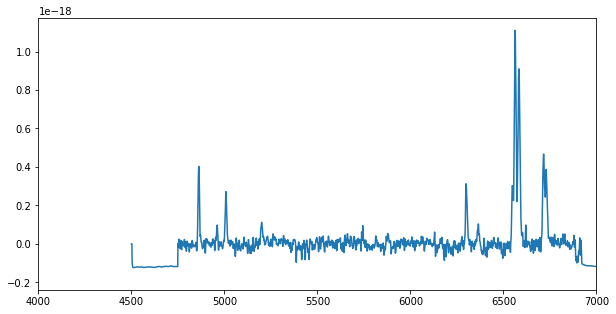

In [7]:
sp_no_cont = sp1 - sp2

fig = plt.figure(figsize=(10,5))
plt.plot(sp_no_cont.wavelength, sp_no_cont.flux)
plt.xlim(4000,7000)

(4000, 7000)

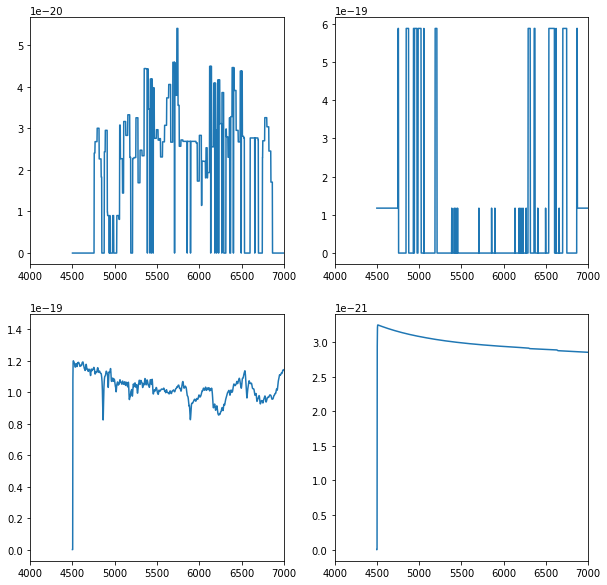

In [8]:
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
sp = oned.spectrum(row_name="error")
plt.plot(sp.wavelength, sp.flux)
plt.xlim(4000,7000)

plt.subplot(222)
sp = oned.spectrum(row_name="mask")
plt.plot(sp.wavelength, sp.flux)
plt.xlim(4000,7000)


plt.subplot(223)
sp = oned.spectrum(row_name="stellar")
plt.plot(sp.wavelength, sp.flux)
plt.xlim(4000,7000)

plt.subplot(224)
sp = oned.spectrum(row_name="nebular")
plt.plot(sp.wavelength, sp.flux)
plt.xlim(4000,7000)

In [9]:
# plot a line with the continuum subtracted
emlines = pyfado.EmLines(fado)

In [10]:
emlines.names

['[NeV]_3425',
 '[OII]_3727',
 '[OII]_3729',
 'H12_3750',
 'H11_3770',
 'H10_3797',
 'H9_3835',
 '[NeIII]_3869',
 'H8HeI_3889',
 '[NeIII]_3967',
 'Hepsilon_3970',
 'HeI_4026',
 '[SII]_4068',
 '[SII]_4076',
 'Hdelta_4101',
 'Hgamma_4340',
 '[OIII]_4363',
 'HeI_4471',
 '[FeIII]_4658',
 'HeII_4685',
 '[ArIV]_4711',
 'HeI_4713',
 '[ArIV]_4740',
 'Hbeta_4861',
 'HeI_4921',
 '[OIII]_4958',
 '[FeVII]_4988',
 '[OIII]_5006',
 'HeI_5015',
 '[FeVII]_5158',
 '[NI]_5199',
 '[FeIII]_5270',
 '[ClIII]_5519',
 '[NII]_5754',
 'HeI_5875',
 '[FeVII]_6086',
 '[OI]_6300',
 '[SIII]_6312',
 '[OI]_6363',
 '[NII]_6548',
 'Halpha_6562',
 '[NII]_6583',
 'HeI_6678',
 '[SII]_6716',
 '[SII]_6730',
 'HeI_7065',
 '[ArIII]_7135',
 '[OII]_7319',
 '[OII]_7330',
 '[ArIII]_7751',
 '[FeII]_8617']

In [11]:
emlines.results('Halpha_6562')

{'lambda': <Quantity 6562.515 Angstrom>,
 'amplitude': <Quantity 1.10616097e-18 erg / (Angstrom cm2 s)>,
 'sigma': <Quantity 4.6416216 Angstrom>,
 'vel': <Quantity 41.993923 km / s>,
 'shift': <Quantity -0.00197119 Angstrom>,
 'flux': <Quantity 1.28699837e-17 erg / (Angstrom cm2 s)>,
 'ew': <Quantity 129.30693 Angstrom>}

(6300, 6800)

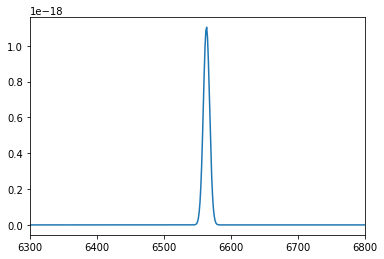

In [12]:
sp_el = emlines.line_spectra("Halpha_6562")

plt.plot(sp_el.wavelength, sp_el.flux)
plt.xlim(6300,6800)

(4500, 7000)

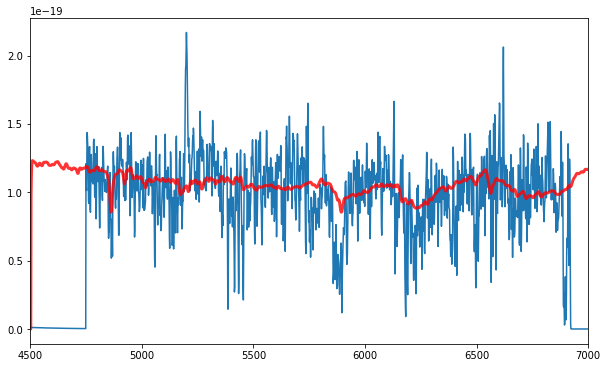

In [19]:
# Let subtract all em line spectra

sp = oned.spectrum(row_name="observed")
sp_best = oned.spectrum(row_name="best fit")

for name in emlines.names:
    sp = sp - emlines.line_spectra(name)

plt.figure(figsize=(10,6))
plt.plot(sp.wavelength, sp.flux)
plt.plot(sp_best.wavelength, sp_best.flux, lw=3, alpha=0.8, color="r")
plt.xlim(4500,7000)
